In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import os
os.chdir("E:/EBAC/Material/M19")

In [2]:
df = pd.read_excel("Mexico GDP.xlsx")
df.head()

,Periodo,GDP
0,1960,1.304000e+10
1,1961,1.416000e+10
2,1962,1.520000e+10
3,1963,1.696000e+10
4,1964,2.008000e+10


In [3]:
# Exploracion de datos
df.describe()

,Periodo,GDP
count,62.000000,6.200000e+01
mean,1990.500000,4.866155e+11
std,18.041619,4.544804e+11
min,1960.000000,1.304000e+10
25%,1975.250000,8.336062e+10
50%,1990.500000,2.885511e+11
75%,2005.750000,8.944031e+11
max,2021.000000,1.315351e+12


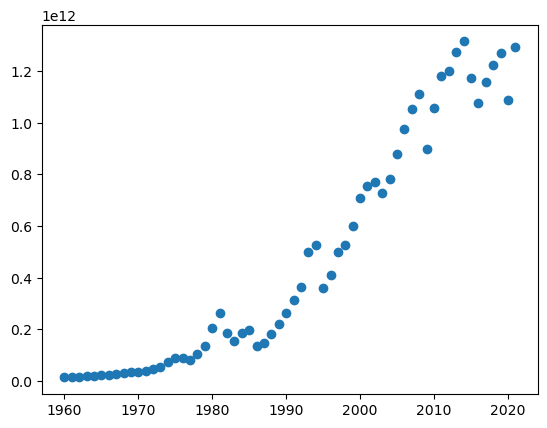

In [4]:
plt.scatter(df.Periodo, df.GDP)

In [5]:
#Definir modelo logistico al que sera ajustada la regresion de minimos cuadrados

def minimos2(x, B1, B2):
    y = 1 / (1 + np.exp(-B1 * (x - B2)))
    return y

In [6]:
msk = np.random.rand(len(df)) <= 0.80
train = df[msk]
test = df[~msk]

In [7]:
from scipy.optimize import curve_fit

train_x = np.asanyarray(train['Periodo'])
train_y = np.asanyarray(train['GDP'])

popt, pcov = curve_fit(minimos2, train_x, train_y)

print("B1 = ", popt[0], "B2 = ", popt[1])

B1 =  1.0 B2 =  1.0


C:\Users\BlewOs\AppData\Local\Temp\ipykernel_33552\345059351.py:6: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(minimos2, train_x, train_y)


In [8]:
# Esta advertencia y valores nos indican que se encontro el mejor ajuste para la curva, lo que sabemos que no es real.
# Una causa puede ser la escala de la informacion por la magnitud de los valores, por lo cual normalizar puede solucionar este caso.

In [29]:
df['GDP_normalized'] = (df['GDP'] - df['GDP'].min()) / (df['GDP'].max() - df['GDP'].min())
df['Periodo_normalized'] = (df['Periodo'] - df['Periodo'].min()) / (df['Periodo'].max() - df['Periodo'].min())
df.head(9)


,Periodo,GDP,GDP_normalized,Periodo_normalized
0,1960,1.304000e+10,0.000000,0.000000
1,1961,1.416000e+10,0.000860,0.016393
2,1962,1.520000e+10,0.001659,0.032787
3,1963,1.696000e+10,0.003010,0.049180
4,1964,2.008000e+10,0.005406,0.065574
5,1965,2.184000e+10,0.006757,0.081967
6,1966,2.432000e+10,0.008662,0.098361
7,1967,2.656000e+10,0.010382,0.114754
8,1968,2.936000e+10,0.012532,0.131148


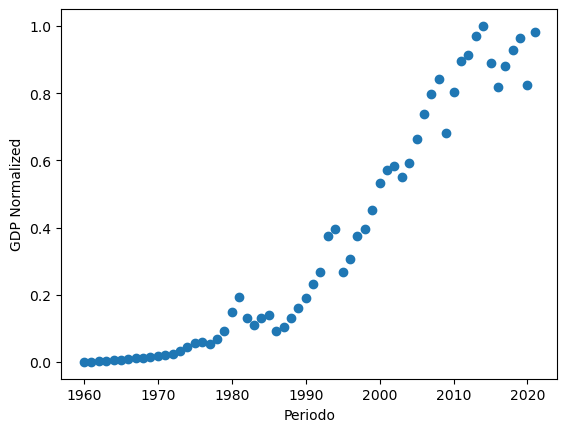

In [31]:
plt.scatter(df['Periodo'], df['GDP_normalized'])
plt.xlabel('Periodo')
plt.ylabel('GDP Normalized')
plt.show()

In [32]:
msk = np.random.rand(len(df)) <= 0.80
train = df[msk]
test = df[~msk]

In [35]:
Tx = np.asanyarray(train['Periodo_normalized'])
Ty = np.asanyarray(train['GDP_normalized'])
test_x = np.asanyarray(test['Periodo_normalized'])
test_y = np.asanyarray(test['GDP_normalized'])

popt, pcov = curve_fit(minimos2, Tx, Ty)

print("B1 = ", popt[0], "B2 = ", popt[1])

B1 =  8.692650316830358 B2 =  0.6515020733957221


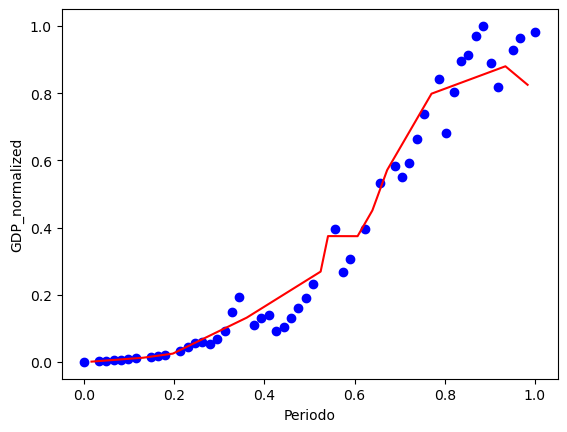

In [38]:
plt.plot(Tx,Ty, 'bo')
plt.plot(test_x,test_y, 'r')
plt.xlabel('Periodo')
plt.ylabel('GDP_normalized')
plt.show()

In [39]:
train_y_hat = minimos2(Tx_scaled, *popt)
test_y_hat = minimos2(test_x_scaled, *popt)

In [41]:
from sklearn.metrics import r2_score
# Evaluacion de los errores

print("Evaluacion de entrenamiento")
print("Mean absolute error: %.2f" % np.mean(np.absolute(train_y_hat - Ty)))
print("Residual sum of squares (MSE): %.2f" % np.mean((train_y_hat - Ty) ** 2))
print("R2-score: %2.f" % r2_score(train_y_hat , Ty))

print("Evaluacion de prueba")
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %2.f" % r2_score(test_y_hat , test_y))

Evaluacion de entrenamiento
Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score:  1
Evaluacion de prueba
Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score:  1


In [44]:
#Utilizacion de metodo alterno debido a la precision
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(Ty, train_y_hat)
test_mse = mean_squared_error(test_y, test_y_hat)

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)

Training MSE: 0.002459475570434088
Testing MSE: 0.003088406585088445


In [46]:
# Calculo de R cuadrada con metodo alterno para verificar precision
from sklearn.metrics import r2_score

train_r2 = r2_score(Ty, train_y_hat)
test_r2 = r2_score(test_y, test_y_hat)

print("Training R-squared:", train_r2)
print("Testing R-squared:", test_r2)

Training R-squared: 0.980402973716304
Testing R-squared: 0.9675282417108295


Con estos nuevos resultados, la grafica y sin advertencias podemos decir que con un bajo MSE y un alto R2 es un buen ajuste
Anteriormente con el rango de los periodos siendo numeros grandes y cercanos entre si y los datos del GDP teniendo una diferencia y magnitud tan grandes ocacionaban problemas en la interpretacion y procesamiento, pero al normalizar o escalar estos valores obtenemos informacion digerible lo que nos permite ajustarlo al model y hacer predicciones.

In [48]:
# Prediccion para el año 2022, primero convertimos el año a la escala utilizada para poderlo procesar
PeriodoEscalado = (2022 - df['Periodo'].min()) / (df['Periodo'].max() - df['Periodo'].min())
NuevaY = minimos2(PeriodoEscalado, *popt)

# Convertir el resultado a la escala real
PrediccionY = NuevaY * (df['GDP'].max() - df['GDP'].min()) + df['GDP'].min()
print("Prediccion del GDP para el 2022:", PrediccionY)


Prediccion del GDP para el 2022: 1262948764094.6892
